In [2]:
import os
import numpy as np
from text_processing.process_data import *
from text_processing.dea import *
from training.train_dev_test import *

import warnings
warnings.filterwarnings('ignore')

## Data Exploratory and Analysis

In [3]:
# paths
files_folder = 'lang_files/'
files_path = os.path.join(os.getcwd(), files_folder)

# initial data
lang_data = compile_all_data(files_path)
lang_data.head()

,sentence,language
0,"Dili, 11 Outubru 2021 - Gabinete Apoiu Ativida...",tet
1,Treinamentu ne’e ninia objetivu prinsipál mak ...,tet
2,Iha loron daruak hosi treinamentu ne’e partisi...,tet
3,Partisipante na’in-56 iha treinamentu ne’e mai...,tet
4,Komunidade iha suku Bikeli ho Makadade agrades...,tet


In [4]:
# after preprocessed and counted each sentence length
clean_data = clean_data_with_count(files_path)
clean_data.head()

,sentence,language,sentence_length
0,dili outubru gabinete apoiu atividade kónjuge...,tet,275
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet,232
2,iha loron daruak hosi treinamentu ne’e partisi...,tet,288
3,partisipante na’in iha treinamentu ne’e mai ho...,tet,82
4,komunidade iha suku bikeli ho makadade agrades...,tet,320


In [4]:
# confirm that the data was cleaned.
clean = clean_data[clean_data['sentence'] =='']
try:
    assert len(clean) == 0
    print("The data is cleaned.")
except AssertionError:
    print("The data is NOT cleaned.")

The data is cleaned.


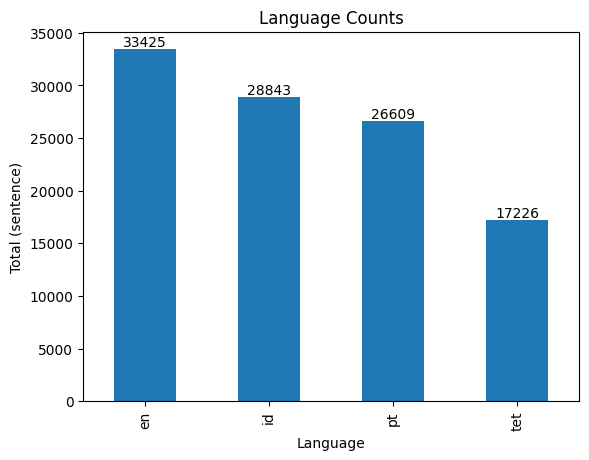

In [5]:
# General data info
display_data_in_bar(clean_data)

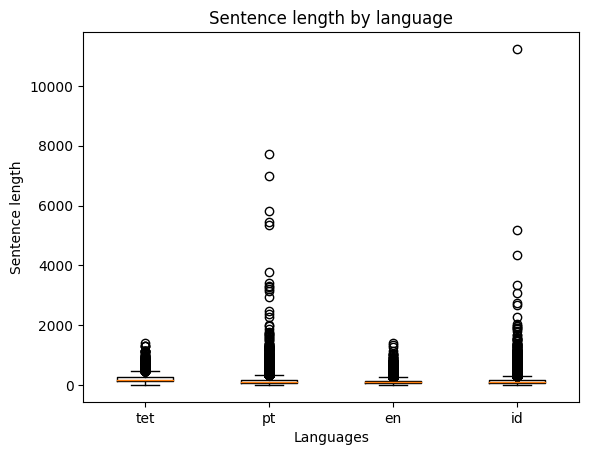

In [6]:
# A plot contains boxplot for each languages
display_data_in_boxplot(clean_data)

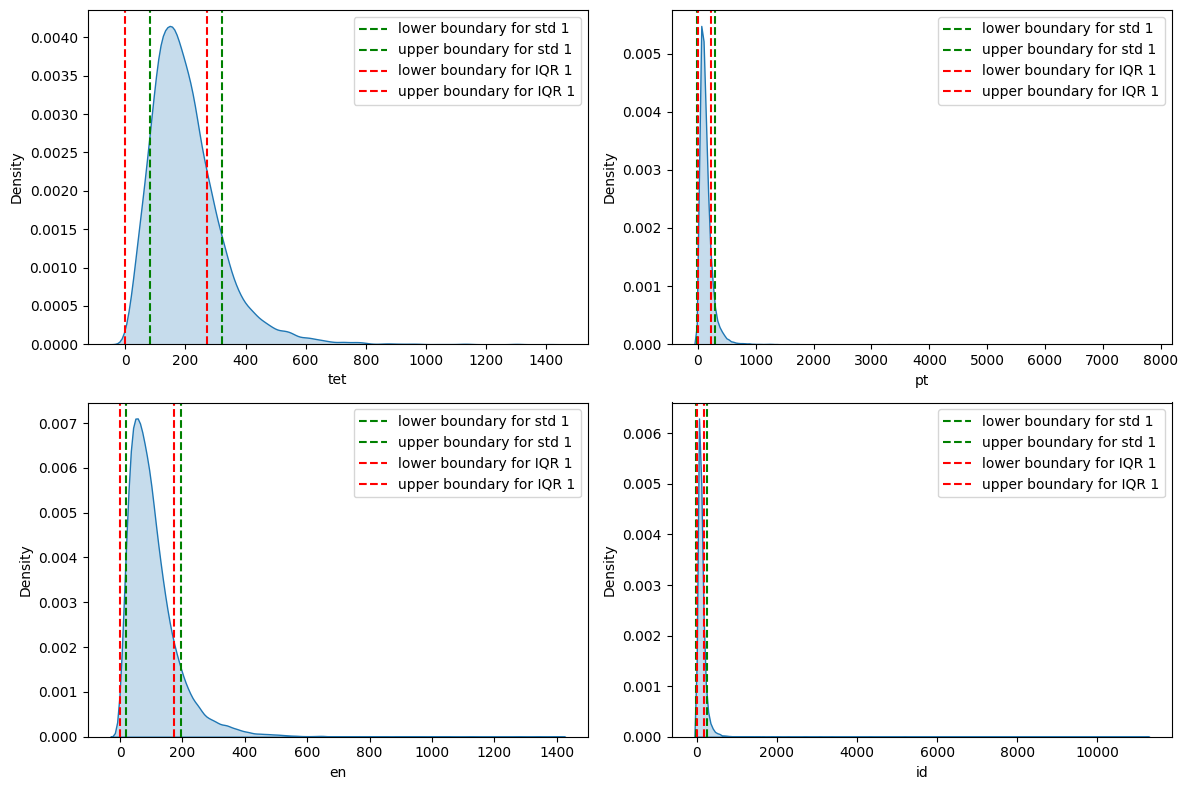

In [7]:
# preview sentence length with Gaussian Distribution
display_data_in_gaussian_dist(clean_data, display_lines=True)

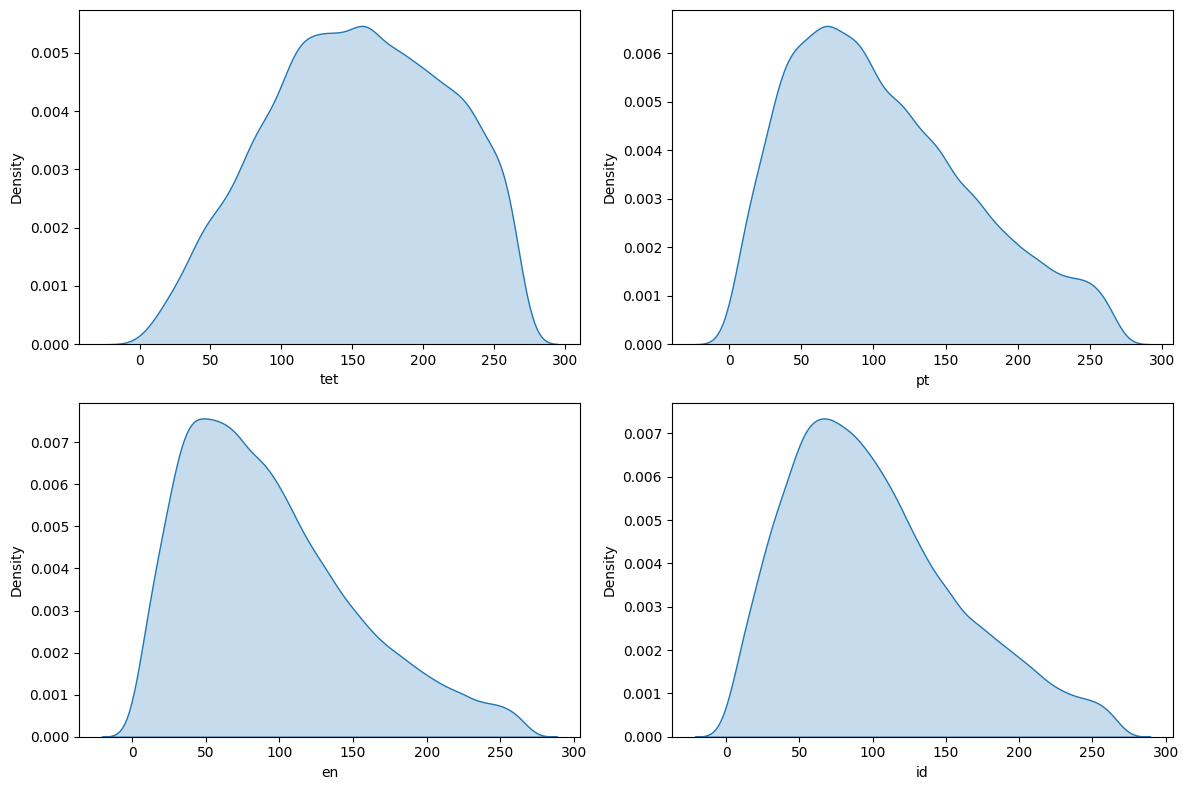

In [8]:
# preview sentence length with Gaussian Distribution after removing outliers
display_data_in_gaussian_dist(clean_data, removed_sentence_outliers, display_lines=False)

In [9]:
# Comparison regarding original data, after removing outliers, and their difference
before = [[len(x)] for x in count_sentences(clean_data)]
after = [[len(x)] for x in removed_sentence_outliers(clean_data)]
difference = [before[i][0] - after[i][0] for i in range(len(before))]
after_removing_outliers = sum([sum(x) for x in after])

print(f"Before removing outliers: {before}\nAfter removing outliers: {after}" )
print(f"Difference (outliers): {difference}\nTotal original data: {len(clean_data)}")
print(f"Total after removing outliers: {after_removing_outliers}\nTotal sentences removed: {sum(difference)}")

Before removing outliers: [[17226], [26609], [33425], [28843]]
After removing outliers: [[13324], [24179], [31785], [26854]]
Difference (outliers): [3902, 2430, 1640, 1989]
Total original data: 106103
Total after removing outliers: 96142
Total sentences removed: 9961


In [10]:
# final clean dataset
final_clean_dataset = final_clean_data(clean_data)
final_clean_dataset.head()

,sentence,language
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet
3,partisipante na’in iha treinamentu ne’e mai ho...,tet
7,enkuantu jenerál manajer cefobom antoninho dou...,tet
8,manufahi dezembru eis jornalista rádiu komu...,tet
10,iha fatin hanesan eis jornalista rádiu komunid...,tet


In [11]:
# confirm if the final_clean_data equals to total_data_after_removing_outliers
try:
    assert len(final_clean_dataset) == after_removing_outliers
    print("Test passed.")
except AssertionError:
    print("The total is different.")

Test passed.


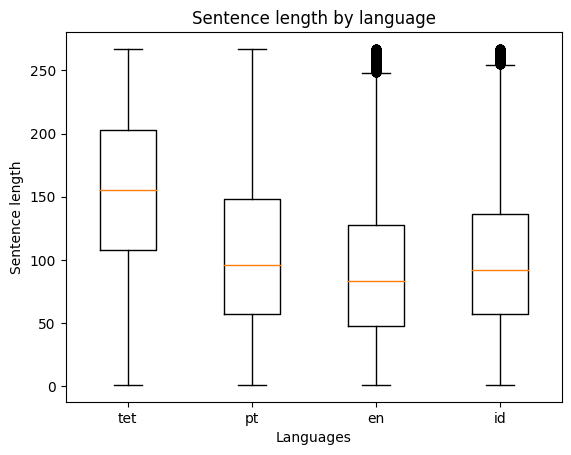

In [12]:
# visualize clean data
display_data_in_boxplot(final_clean_dataset)

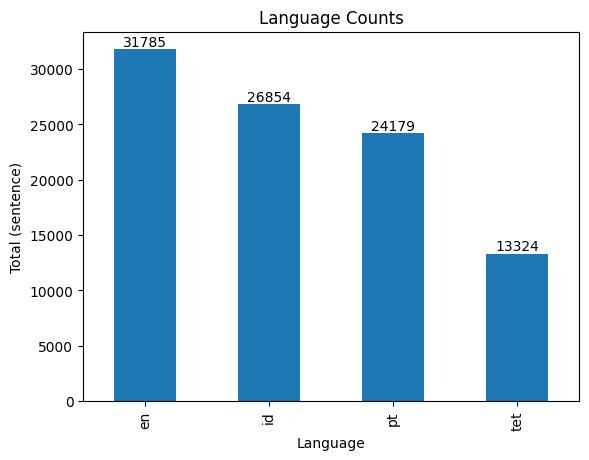

In [13]:
# Clean data info in a bar plot
display_data_in_bar(final_clean_dataset)

In [14]:
# Comparison of the sentences length before and after normalization

# Sentence length
initial_sentence_length = [len(x) for x in clean_data['sentence']]
final_clean_sentence_length = [len(x) for x in final_clean_dataset['sentence']]

# Before normalized
before_sentence_max = np.max(initial_sentence_length)
before_sentence_min = np.min(initial_sentence_length)
before_sentence_avg = np.average(initial_sentence_length)

# After normalized 
after_sentence_max = np.max(final_clean_sentence_length)
after_sentence_min = np.min(final_clean_sentence_length)
after_sentence_avg = np.average(final_clean_sentence_length)

print(f'Sentence max length before normalized: {before_sentence_max} and after normalized: {after_sentence_max}')
print(f'Sentence min length before normalized: {before_sentence_min} and after normalized: {after_sentence_min}')
print(f'Sentence avg length before normalized: {before_sentence_avg: .2f} and after normalized: {after_sentence_avg: .2f}')

Sentence max length before normalized: 11240 and after normalized: 267
Sentence min length before normalized: 1 and after normalized: 1
Sentence avg length before normalized:  135.09 and after normalized:  107.33


## Clustering

In [15]:
# select the dataset fraction for clustering
final_clean_dataset_cluster = final_clean_dataset.sample(frac=0.05, random_state=42)
print('Total: ', len(final_clean_dataset_cluster))

Total:  4807


In [16]:
#Generate plot for each clustering algorithm

#kmeans
display_data_in_clustering(final_clean_dataset_cluster, KMeans, "K-Means", using_random_state=True)
#gaussian_mixture
display_data_in_clustering(final_clean_dataset_cluster, GaussianMixture, "Gaussian-Mixture", using_n_components=True, using_random_state=True)
#agglomerative
display_data_in_clustering(final_clean_dataset_cluster, AgglomerativeClustering, "Agglomerative")
# birch
display_data_in_clustering(final_clean_dataset_cluster, Birch, "Birch")

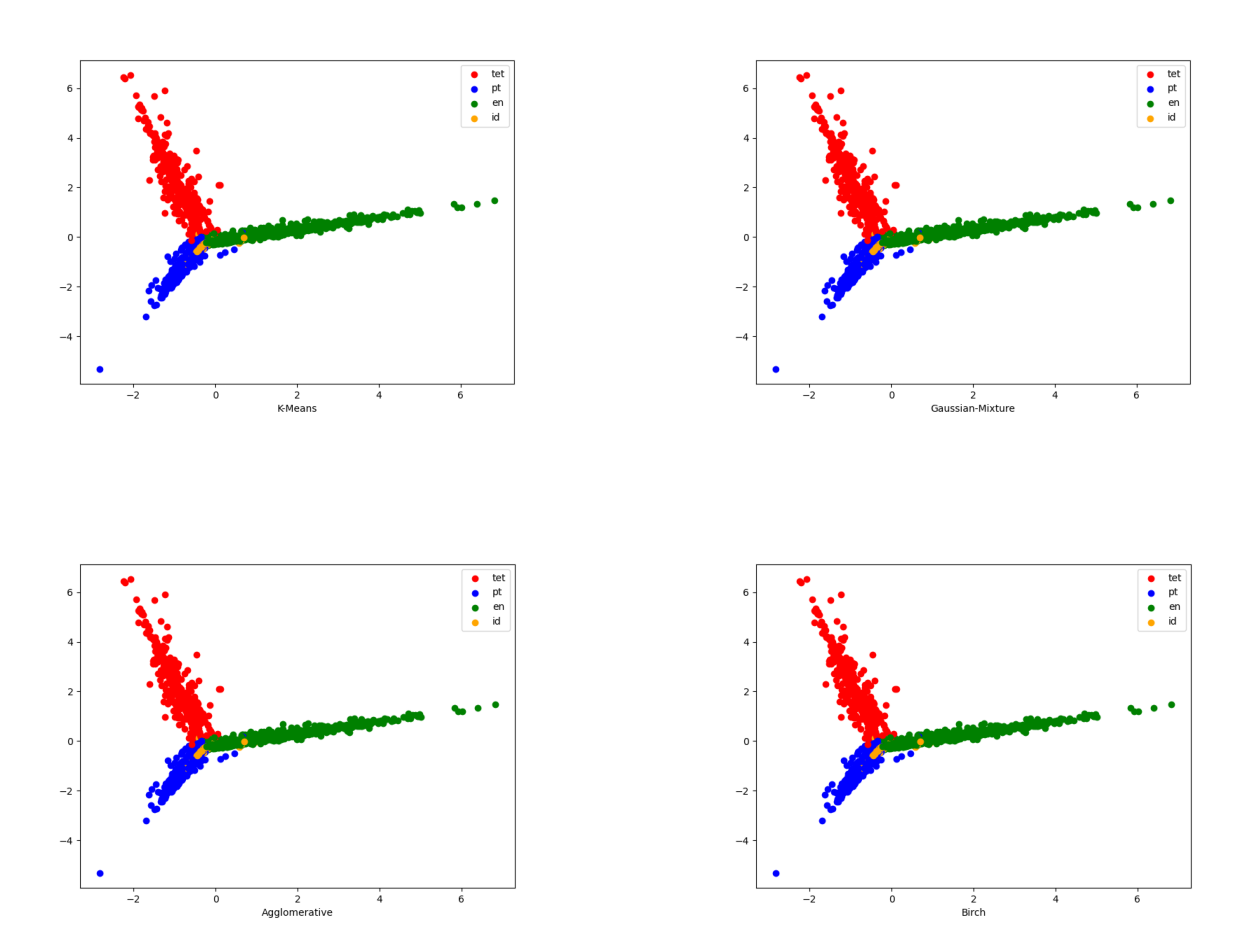

In [32]:
# Compile the plots in an image
display_images("k-means.png", "gaussian-mixture.png", "agglomerative.png", "birch.png")

## Train and test model

### Split dataset

In [18]:
# Split dataset to train, development(dev)/validation, and test sets
X_train, y_train, X_dev, y_dev, X_test, y_test = train_dev_test_split(final_clean_dataset, 0.2, 0.5)

# print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Dev set size:", len(X_dev))
print("Test set size:", len(X_test))

Train set size: 76913
Dev set size: 9614
Test set size: 9615


### Train and evaluate model

In [19]:
# Train and evaluate the model using dev set

# Models to be compared
    #('svm', LinearSVC())
    #('logistic_reg', LogisticRegression(multi_class='ovr'))
    #('nb', MultinomialNB())

# Train the model
model = train_model(TfidfVectorizer(), MultinomialNB(), X_train, y_train)

# Evaluate the model using dev set
evaluate_model(model,X_dev, y_dev)

Accuracy:  0.9959434158518826
Confusion Matrix:  [[3199    2    3    1]
 [  15 2663    1    0]
 [  11    1 2387    1]
 [   2    0    2 1326]]
Classification Report:                precision    recall  f1-score   support

          en       0.99      1.00      0.99      3205
          id       1.00      0.99      1.00      2679
          pt       1.00      0.99      1.00      2400
         tet       1.00      1.00      1.00      1330

    accuracy                           1.00      9614
   macro avg       1.00      1.00      1.00      9614
weighted avg       1.00      1.00      1.00      9614



### Test model

In [20]:
# Evaluate the model using test set
evaluate_model(model, X_test, y_test)

Accuracy:  0.9957358294331773
Confusion Matrix:  [[3163    1    1    0]
 [  22 2660    0    2]
 [   8    1 2442    3]
 [   2    0    1 1309]]
Classification Report:                precision    recall  f1-score   support

          en       0.99      1.00      0.99      3165
          id       1.00      0.99      1.00      2684
          pt       1.00      1.00      1.00      2454
         tet       1.00      1.00      1.00      1312

    accuracy                           1.00      9615
   macro avg       1.00      1.00      1.00      9615
weighted avg       1.00      1.00      1.00      9615



### Further test

In [21]:
test1 = model.predict(["Organizasaun mundial saúde"])
test2 = model.predict(["Tribunál rekursu rejeita kandidatura partidu"])
print(f"Test 1 classification: {test1}\nTest 2 classification: {test2}")

Test 1 classification: ['tet']
Test 2 classification: ['tet']


In [22]:
input = ["Deklarasaun Universál Direitus Umanus", 
        "Indonesia merupakan negara terluas ke-14 sekaligus",
        "A língua portuguesa, também designada português, é uma língua",
        "Deklarasaun ne'e inklui artigu 30 ne'ebé esplika Asembleia Jerál",
        "Can we feed a future population of 10 billion people a healthy?"
        ]

# Naive Bayes and Logistic Regression
pred_probs = model.predict_proba(input)

for i, probs in enumerate(pred_probs):
    print(input[i])
    for j, lang in enumerate(model.classes_):
        print(lang, probs[j])

Deklarasaun Universál Direitus Umanus
en 0.08069338972616051
id 0.08271336308959881
pt 0.07867512660530795
tet 0.7579181205789338
Indonesia merupakan negara terluas ke-14 sekaligus
en 0.00020319209638445843
id 0.999472082612158
pt 0.00011667127392798882
tet 0.00020805401753064506
A língua portuguesa, também designada português, é uma língua
en 0.002385343286718923
id 0.002491962450970365
pt 0.9838945588993049
tet 0.011228135363004654
Deklarasaun ne'e inklui artigu 30 ne'ebé esplika Asembleia Jerál
en 3.6667906115040164e-05
id 4.188828276996474e-05
pt 4.047524877270782e-05
tet 0.9998809685623405
Can we feed a future population of 10 billion people a healthy?
en 0.999730922794428
id 0.00011727673736144578
pt 8.018603521239253e-05
tet 7.161443299752982e-05


In [ ]:
# SVM - LinearSVC
pred_result = model.predict(input)
pred_probability = model.decision_function(input)
for i in range(len(input)):
    print(f"{input[i]} ---> {pred_result[i]} ---> {np.argmax(pred_probability[i])} --> {pred_probability[i]} ")

### Save model [if required]

In [28]:
import joblib

# save the model to a file
joblib.dump(model, 'model_best/tet-lid-model_NB_best.pkl')

['model_best/tet-lid-model_NB_best.pkl']

In [29]:
# load the save model from a file
saved_model = joblib.load('model_best/tet-lid-model_NB_best.pkl')

In [30]:
from unidecode import unidecode

text = """
𝐋𝐚 𝐏𝐚𝐫𝐭𝐢𝐬𝐢𝐩𝐚 𝐀𝐧𝐢𝐯𝐞𝐫𝐬𝐚𝐫𝐢𝐮 𝐕𝐞𝐭𝐞𝐫𝐚𝐧𝐮 𝐁𝐚 𝐃𝐚𝐥𝐚 𝐕𝐈 𝐗𝐚𝐧𝐚𝐧𝐚: “𝐇𝐚’𝐮 𝐋𝐚 𝐇𝐚𝐥𝐨 𝐁𝐮𝐚𝐭 𝐈𝐝𝐚, 𝐇𝐮𝐬𝐮 𝐁𝐚 𝐉𝐞𝐧𝐞𝐫𝐚𝐥 𝐧𝐨 𝐅𝐮𝐧𝐝𝐚𝐝𝐨𝐫 𝐒𝐢𝐫𝐚, 𝐓𝐚𝐧𝐛𝐚 𝐇𝐚’𝐮 𝐍𝐞’𝐞 𝐒𝐨𝐞𝐡𝐚𝐫𝐭𝐨 𝐊𝐞𝐝𝐮𝐚” 
"""

plain_text = unidecode(text)
plain_text

'\nLa Partisipa Aniversariu Veteranu Ba Dala VI Xanana: "Ha\'u La Halo Buat Ida, Husu Ba Jeneral no Fundador Sira, Tanba Ha\'u Ne\'e Soeharto Kedua" \n'

In [31]:
saved_model.predict([plain_text])

array(['tet'], dtype='<U3')